In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [2]:
theta1 = 0.005
theta = str(theta1)
N21 = 1e-5
N2 = "1e-5"
Vinf1 = 0.05
Vinf = str(Vinf1)
h = str(103.0)
fstar = (1e-8+theta1**2*N21)**(0.5)
delta = 0.1
bo = 0

In [3]:
(1e-4*Vinf1)/(N21*((1+N21*theta1**2/1e-8)**(-1))*theta1)

102.5

In [4]:
# file

In [5]:
# dataTKE_terms_height_41.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.02.nc

In [6]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
# file = "dataTKE_terms_height_103.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.05.nc"#f"dataTKE_terms_height_{h}_theta_{theta}_stratification_{N2}_interior_velocity_{Vinf}.nc"
# file = f"TKE_terms_height_{h}_theta_{theta}_stratification_{N2}_interior_velocity_{Vinf}_delta_{delta}_bo_{bo}_1e-4_noise.nc"
# file = "TKE_terms_height_104.0_theta_0.005_stratification_9.9e-6_interior_velocity_0.05_delta_0.1_bo_0.nc"
# file = "TKE_terms_height_103.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.05_delta_0.1_bo_0_visc_0_high_res.nc" # _visc_1.0e-5
file = "olddata/dataTKE_terms_height_103.0_theta_0.005_stratification_1.0e-5_interior_velocity_0.05.nc"
ocean_data=xr.open_dataset("/glade/derecho/scratch/knudsenl/data/"+file)#.isel(time=slice(0,4000)) #i=103
# file2 = f"flow_fields_height_{h}_theta_{theta}_stratification_{N2}_interior_velocity_{Vinf}_delta_{delta}_bo_{bo}.nc"
# ocean_data2=xr.open_dataset("/glade/derecho/scratch/knudsenl/data/"+file2)#.isel(time=slice(0,4000)) #i=103

In [7]:
# u = ocean_data.u#+ocean_data.U
# v = ocean_data.v#+ocean_data.V
# b = ocean_data.B
# # B = ocean_data.B
# w = ocean_data.w

In [8]:
KE_spatial_average_time_series = ocean_data.k.mean(dim=['xC','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'k' (time: 10002)> Size: 80kB
array([7.90765037e-09, 7.07556237e-09, 6.20608021e-09, ...,
       3.42252812e-06, 3.44144299e-06, 3.45939741e-06])
Coordinates:
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152

In [9]:
# KE_t_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
# KE_t_spatial_average_time_series

In [10]:
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*fstar/(2*np.pi)
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [11]:
seconds = KE_spatial_average_time_series.time/pd.Timedelta("1s")
# KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(sec = ('time',seconds.data))

In [12]:
# plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values)
# plt.show()

In [13]:
timeKE = KE_spatial_average_time_series.time
timeKE*1e-9

<xarray.DataArray 'time' (time: 10002)> Size: 80kB
array([      0,     314,     628, ..., 3141278, 3141592, 3141906],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152

In [24]:
KE_spatial_average_time_series_ip.intp[988]

<xarray.DataArray 'intp' ()> Size: 8B
array(5.00136881)
Coordinates:
    time     timedelta64[ns] 8B 3 days 14:13:09.354174672
    intp     float64 8B 5.001

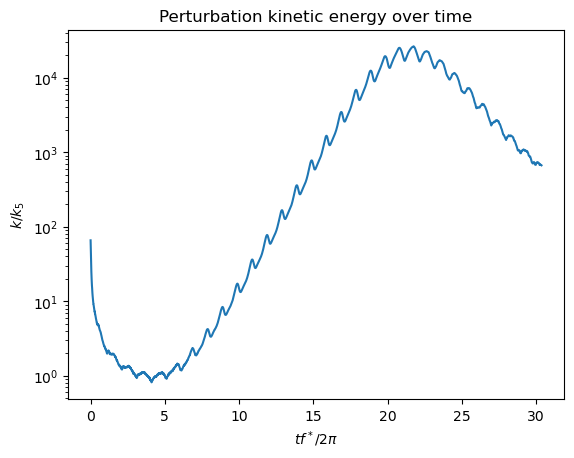

In [15]:
plt.plot(KE_spatial_average_time_series_ip.intp[0:6000],KE_spatial_average_time_series_ip.values[0:6000]/KE_spatial_average_time_series_ip.values[988])
plt.title("Perturbation kinetic energy over time")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$tf^*/2\pi$')
plt.yscale('log')
# plt.savefig("PKEplot.pdf")
plt.show()

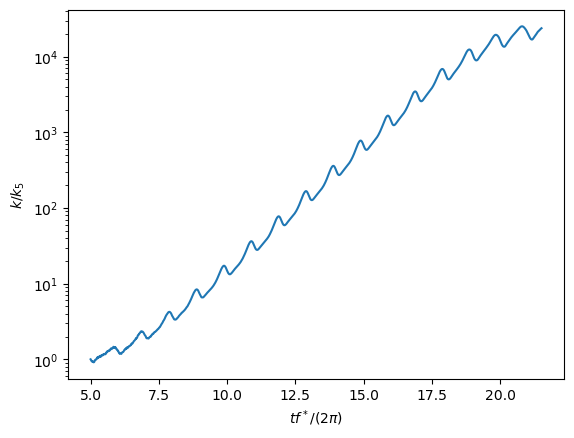

In [180]:
ts = 988
tf = 4250
plt.plot(KE_spatial_average_time_series_ip.intp[ts:tf],KE_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts])
# plt.title("Pertubation Kinetic Energy During Linear Phase")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$tf^*/(2\pi)$')
plt.yscale('log')
plt.savefig("linear_phase_plot.png")
plt.show()

In [26]:
lr = sc.stats.linregress(x=seconds[ts:tf],y=np.log(KE_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts]))
lr

LinregressResult(slope=1.1101266389149848e-05, intercept=-4.012347970079567, rvalue=0.9965555382809466, pvalue=0.0, stderr=1.6179444109873714e-08, intercept_stderr=0.0141441046177352)

In [27]:
np.exp(lr.intercept)

0.018090868512619436

In [28]:
grwthrate = lr.slope
grwthrate = np.round(grwthrate,7)
grwthrt = str(grwthrate)
print(f"The growth rate of the linear phase is {grwthrate} $m^2 s^-3$")

The growth rate of the linear phase is 1.11e-05 $m^2 s^-3$


In [29]:
np.log(np.exp(1))

0.9999999999999999

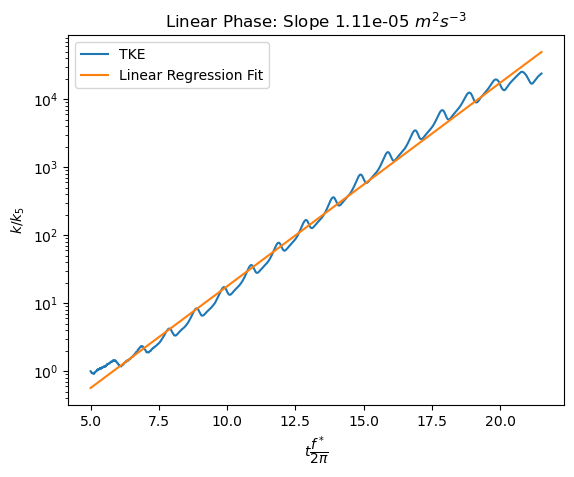

In [30]:
plt.plot(KE_spatial_average_time_series_ip.intp[ts:tf],KE_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts],label="TKE")
plt.plot(seconds[ts:tf]*fstar/(2*np.pi),np.exp(lr.slope*seconds[ts:tf]+lr.intercept),label="Linear Regression Fit")
plt.title("Linear Phase: Slope "+grwthrt+" $m^2 s^{-3}$")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$t\dfrac{f^*}{2\pi}$')
plt.legend()
plt.yscale('log')
plt.show()

In [31]:
AGSP_spatial_average_time_series = ocean_data.AGSP.mean(dim=['xC','yC','zC'])
inertial_period = AGSP_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


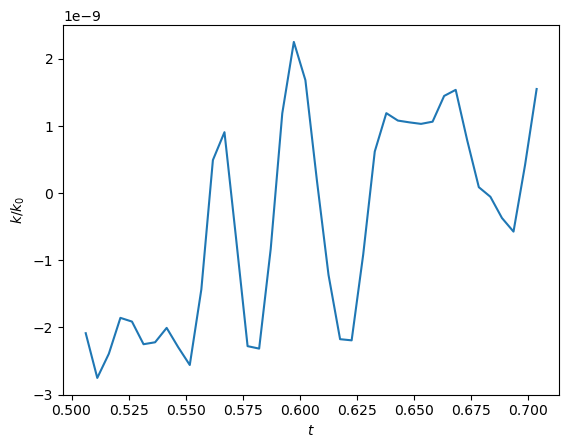

In [32]:
plt.plot(AGSP_spatial_average_time_series_ip.intp[100:140],AGSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [33]:
WSP_spatial_average_time_series = ocean_data.WSP.mean(dim=['xC','yC','zC'])
inertial_period = WSP_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
WSP_spatial_average_time_series_ip = WSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

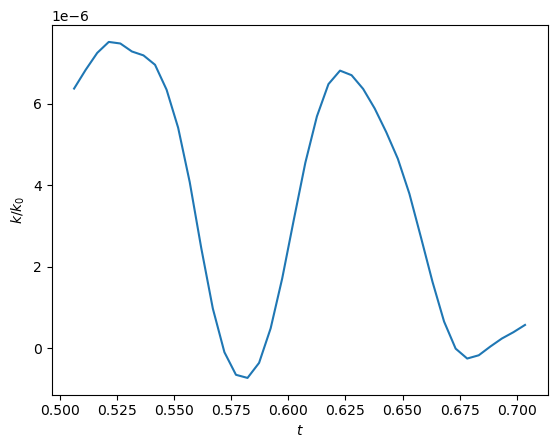

In [34]:
plt.plot(WSP_spatial_average_time_series_ip.intp[100:140],WSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [35]:
GSP_spatial_average_time_series = ocean_data.GSP.mean(dim=['xC','yC','zC'])
inertial_period = GSP_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


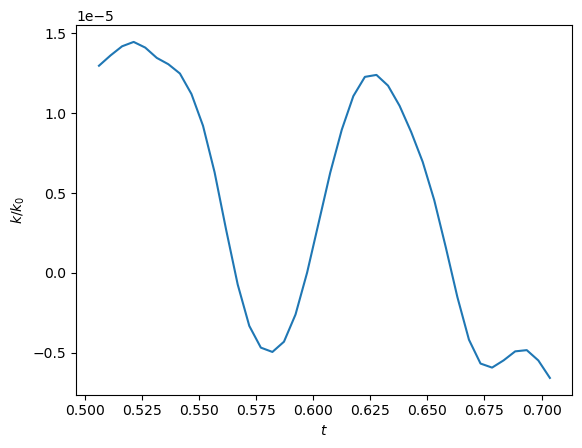

In [36]:
plt.plot(GSP_spatial_average_time_series_ip.intp[100:140],GSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [37]:
BFLUX_spatial_average_time_series = ocean_data.BFLUX.mean(dim=['xC','yC','zC'])
inertial_period = BFLUX_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


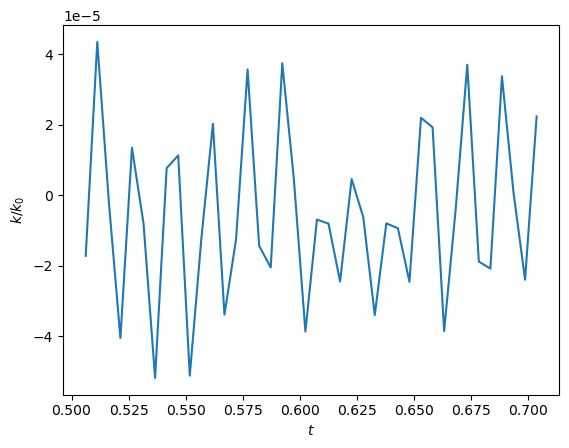

In [38]:
plt.plot(BFLUX_spatial_average_time_series_ip.intp[100:140],BFLUX_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [39]:
E_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])
inertial_period = E_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
E_spatial_average_time_series_ip = E_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


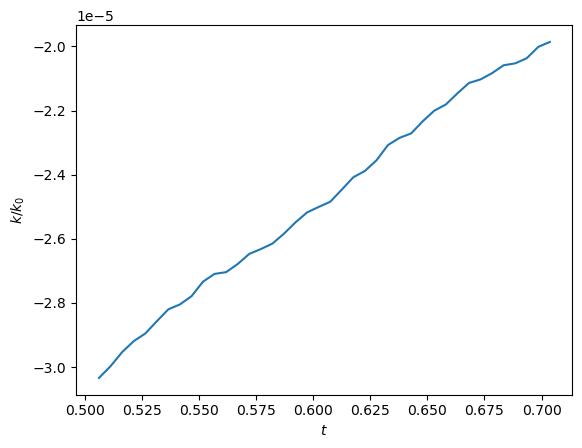

In [40]:
plt.plot(E_spatial_average_time_series_ip.intp[100:140],-1*E_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [41]:
# PWORK_spatial_average_time_series = ocean_data.PWORK.mean(dim=['xC','yC','zC'])
# inertial_period = PWORK_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
# PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [42]:
# plt.plot(PWORK_spatial_average_time_series_ip.intp,1e4*PWORK_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values)
# plt.ylabel('$k$/$k_0$')
# plt.xlabel('$t$')
# # plt.yscale('log')
# plt.show()

In [43]:
ocean_data

<xarray.Dataset> Size: 31GB
Dimensions:  (zC: 128, zF: 129, xC: 512, yF: 1, xF: 512, yC: 1, time: 10002)
Coordinates:
  * zC       (zC) float64 1kB 0.7812 2.344 3.906 5.469 ... 196.1 197.7 199.2
  * zF       (zF) float64 1kB 0.0 1.562 3.125 4.688 ... 195.3 196.9 198.4 200.0
  * xC       (xC) float64 4kB 1.953 5.859 9.766 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 8B 1.0
  * xF       (xF) float64 4kB 0.0 3.906 7.812 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152
Data variables:
    BFLUX    (time, zC, yC, xC) float64 5GB 0.0 0.0 0.0 ... 8.722e-13 -9.495e-13
    WSP      (time, zC, yC, xC) float64 5GB 1.653e-13 9.264e-14 ... -0.0 -0.0
    AGSP     (time, zC, yC, xC) float64 5GB 4.658e-16 1.495e-16 ... 6.147e-13
    k        (time, zC, yC, xC) float64 5GB 8.673e-10 1.172e-09 ... 3.023e-06
    GSP      (time, zC, yC, xC) float64 5GB -3.305e-13 -1.853e-13 ... -0.0 -0.0
    E        (time, zC, yC, xC) float64 5GB 5.147e-13 1.164e-13 ... 1.783e-13
Attributes:
    interval:              314.1592653589793
    Oceananigans:          This file was generated using Oceananigans v0.91.4
    Julia:                 This file was generated using Julia Version 1.10.2...
    output time interval:  Output was saved every 5.236 minutes.
    date:                  This file was generated on 2024-08-26T12:07:57.579.
    schedule:              TimeInterval

In [44]:
# KTRANS_spatial_average_time_series = ocean_data.KTRANS.mean(dim=['xC','yC','zC'])
# inertial_period = KTRANS_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
# KTRANS_spatial_average_time_series_ip = KTRANS_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [45]:
# plt.plot(KTRANS_spatial_average_time_series_ip.intp,1e4*KTRANS_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values)
# plt.ylabel('$k$/$k_0$')
# plt.xlabel('$t$')
# # plt.yscale('log')
# plt.show()

In [46]:
# KDISS_spatial_average_time_series = ocean_data.KDISS.mean(dim=['xC','yC','zC'])
# inertial_period = KDISS_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
# KDISS_spatial_average_time_series_ip = KDISS_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [47]:
# plt.plot(KDISS_spatial_average_time_series_ip.intp,1e4*KDISS_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values)
# plt.ylabel('$k$/$k_0$')
# plt.xlabel('$t$')
# # plt.yscale('log')
# plt.show()

In [48]:
# KE_turb = ocean_data.k.mean(dim=['xC','yC','zC'])
# KE_turb


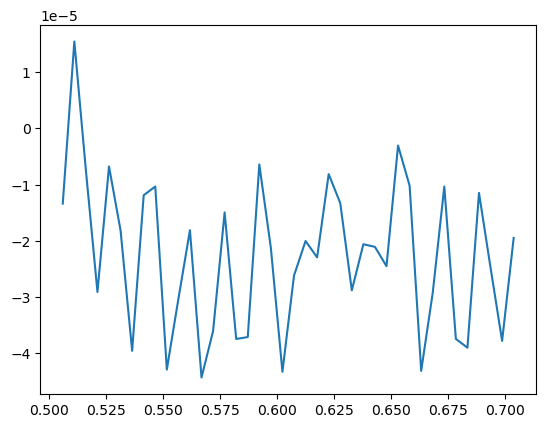

In [49]:
KE_turb = ocean_data.k.mean(dim=['xC','yC','zC'])
seconds = KE_turb.time/pd.Timedelta("1s")
inertial_period = KE_turb.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
KE_turb_ip = KE_turb.assign_coords(intp = ('time',inertial_period.data))
KE_turb_ip = KE_turb_ip.assign_coords(sec = ('time',seconds.data))
# seconds = KE_spatial_average_time_series.time/pd.Timedelta("1s")
# inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
# KE_spatial_average_time_series_s= KE_spatial_average_time_series.assign_coords(sec = ('time',seconds.data))
# KE_spatial_average_time_series_intp = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
dkdt = KE_turb_ip.differentiate(coord='sec',edge_order=2)
# np.gradient(KE_spatial_average_time_series_ip,KE_spatial_average_time_series_ip.time)
plt.plot(inertial_period[100:140],dkdt[100:140]/KE_spatial_average_time_series[100:140])


In [50]:
dkdt

<xarray.DataArray 'k' (time: 10002)> Size: 80kB
array([-2.58910373e-12, -2.70813301e-12, -2.20201327e-12, ...,
        6.03476895e-11,  5.86792900e-11,  5.56220887e-11])
Coordinates:
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152
    intp     (time) float64 80kB 0.0 0.005062 0.01012 ... 50.62 50.62 50.63
    sec      (time) float64 80kB 0.0 314.2 628.3 ... 3.142e+06 3.142e+06

In [51]:
inertial_period[1865]

<xarray.DataArray 'time' ()> Size: 8B
array(9.44084295)
Coordinates:
    time     timedelta64[ns] 8B 6 days 18:45:07.029894496

In [52]:
dkdt

<xarray.DataArray 'k' (time: 10002)> Size: 80kB
array([-2.58910373e-12, -2.70813301e-12, -2.20201327e-12, ...,
        6.03476895e-11,  5.86792900e-11,  5.56220887e-11])
Coordinates:
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152
    intp     (time) float64 80kB 0.0 0.005062 0.01012 ... 50.62 50.62 50.63
    sec      (time) float64 80kB 0.0 314.2 628.3 ... 3.142e+06 3.142e+06

In [53]:
AGSP_spatial_average_time_series_ip

<xarray.DataArray 'AGSP' (time: 10002)> Size: 80kB
array([ 3.45805981e-18,  4.40483137e-18,  4.79314414e-18, ...,
       -3.06360276e-11, -3.39462773e-11, -3.69410955e-11])
Coordinates:
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152
    intp     (time) float64 80kB 0.0 0.005062 0.01012 ... 50.62 50.62 50.63

In [160]:
dkdt.intp[2963]

<xarray.DataArray 'intp' ()> Size: 8B
array(14.99904432)
Coordinates:
    time     timedelta64[ns] 8B 10 days 18:34:13.903258656
    intp     float64 8B 15.0
    sec      float64 8B 9.309e+05

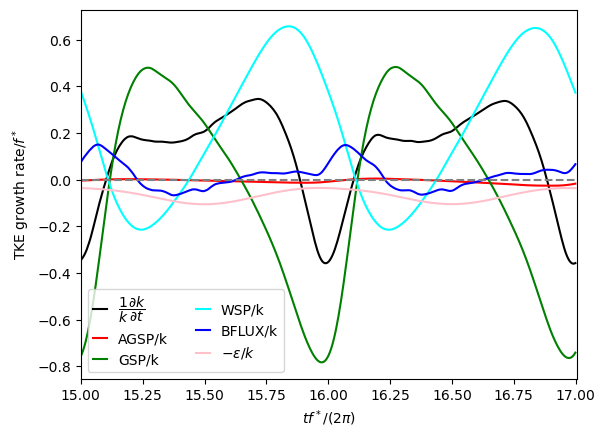

In [171]:
ts = 2963 #2173
tf = 3359 #2200
plt.plot(dkdt.intp[ts:tf],dkdt[ts:tf]/(KE_turb_ip[ts:tf]*fstar),color="k",label='$\dfrac{1}{k}\dfrac{\partial k}{\partial t}$')
plt.plot(AGSP_spatial_average_time_series_ip.intp[ts:tf],AGSP_spatial_average_time_series_ip.values[ts:tf]/(KE_turb_ip.values[ts:tf]*fstar),color='red',label='AGSP/k')
plt.plot(GSP_spatial_average_time_series_ip.intp[ts:tf],GSP_spatial_average_time_series_ip.values[ts:tf]/(KE_turb_ip.values[ts:tf]*fstar),color='green',label='GSP/k')
plt.plot(WSP_spatial_average_time_series_ip.intp[ts:tf],WSP_spatial_average_time_series_ip.values[ts:tf]/(KE_turb_ip.values[ts:tf]*fstar),color='cyan',label='WSP/k')
plt.plot(BFLUX_spatial_average_time_series_ip.intp[ts:tf],BFLUX_spatial_average_time_series_ip.values[ts:tf]/(KE_turb_ip.values[ts:tf]*fstar),color='blue',label='BFLUX/k')
plt.plot(E_spatial_average_time_series_ip.intp[ts:tf],-1*E_spatial_average_time_series_ip.values[ts:tf]/(KE_turb_ip.values[ts:tf]*fstar),color='pink',label='$-\epsilon/k$')
# plt.plot(PWORK_spatial_average_time_series_ip.intp[ts:tf],1e4*PWORK_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='orange')
# plt.plot(KDISS_spatial_average_time_series_ip.intp[ts:tf],1e4*KDISS_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='cyan')
# plt.plot(KTRANS_spatial_average_time_series_ip.intp[ts:tf],1e4*KTRANS_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='magenta')
plt.axhline(color="grey",linestyle="--")
plt.xlabel("$tf^*/(2\pi)$")
plt.ylabel("TKE growth rate/$f^*$")
# plt.title("Normalized TKE Terms")
plt.xlim([dkdt.intp[ts],dkdt.intp[tf]])
plt.legend(loc="lower left",prop={'size':10},ncol=2,handlelength=1) # handlelength=0.7
# plt.figure(figsize=(12,5))
plt.savefig("TKE_time_terms.png")
plt.show()

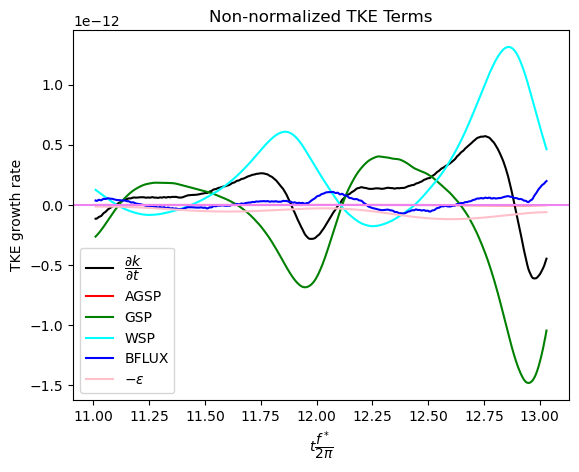

<Figure size 1200x500 with 0 Axes>

In [55]:
ts = ts #1800
tf = tf #2200
plt.plot(dkdt.intp[ts:tf],dkdt[ts:tf],color="k",label='$\dfrac{\partial k}{\partial t}$')
plt.plot(AGSP_spatial_average_time_series_ip.intp[ts:tf],AGSP_spatial_average_time_series_ip.values[ts:tf],color='red',label='AGSP')
plt.plot(GSP_spatial_average_time_series_ip.intp[ts:tf],GSP_spatial_average_time_series_ip.values[ts:tf],color='green',label='GSP')
plt.plot(WSP_spatial_average_time_series_ip.intp[ts:tf],WSP_spatial_average_time_series_ip.values[ts:tf],color='cyan',label='WSP')
plt.plot(BFLUX_spatial_average_time_series_ip.intp[ts:tf],BFLUX_spatial_average_time_series_ip.values[ts:tf],color='blue',label='BFLUX')
plt.plot(E_spatial_average_time_series_ip.intp[ts:tf],-1*E_spatial_average_time_series_ip.values[ts:tf],color='pink',label='$-\epsilon$')
# plt.plot(PWORK_spatial_average_time_series_ip.intp[ts:tf],1e4*PWORK_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='orange')
# plt.plot(KDISS_spatial_average_time_series_ip.intp[ts:tf],1e4*KDISS_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='cyan')
# plt.plot(KTRANS_spatial_average_time_series_ip.intp[ts:tf],1e4*KTRANS_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='magenta')
plt.axhline(color="violet")
plt.xlabel("$t\dfrac{f^*}{2\pi}$")
plt.ylabel("TKE growth rate")
plt.title("Non-normalized TKE Terms")
plt.legend(loc='lower left')
plt.figure(figsize=(12,5))
# plt.savefig("TKE_time_terms.pdf")
plt.show()

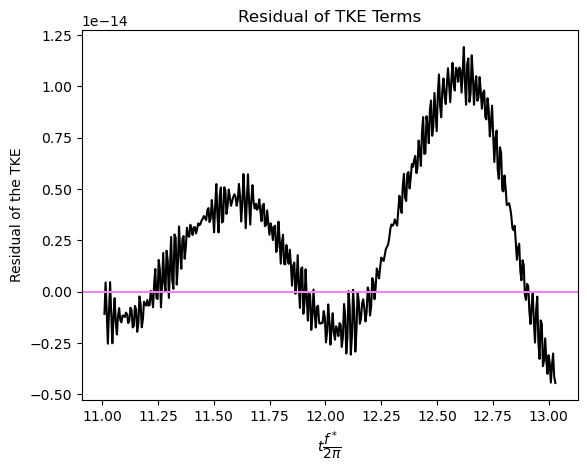

<Figure size 1200x500 with 0 Axes>

In [56]:
sum = dkdt[ts:tf]-AGSP_spatial_average_time_series_ip.values[ts:tf]-WSP_spatial_average_time_series_ip.values[ts:tf]-GSP_spatial_average_time_series_ip.values[ts:tf]-BFLUX_spatial_average_time_series_ip.values[ts:tf]+E_spatial_average_time_series_ip.values[ts:tf]
plt.plot(dkdt.intp[ts:tf],sum.values,color="k")
plt.axhline(color="violet")
plt.xlabel("$t\dfrac{f^*}{2\pi}$")
plt.ylabel("Residual of the TKE")
plt.title("Residual of TKE Terms")
# plt.legend(loc='lower left')
plt.figure(figsize=(12,5))
# plt.savefig("TKE_time_terms.pdf")
plt.show()

In [57]:
# eps_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])

In [58]:
# plt.plot(eps_spatial_average_time_series.time*(1e-4)/(2*np.pi),-1*eps_spatial_average_time_series.values)
# plt.show()

In [59]:
AGSP_spatial_average_time_series_ip

<xarray.DataArray 'AGSP' (time: 10002)> Size: 80kB
array([ 3.45805981e-18,  4.40483137e-18,  4.79314414e-18, ...,
       -3.06360276e-11, -3.39462773e-11, -3.69410955e-11])
Coordinates:
  * time     (time) timedelta64[ns] 80kB 00:00:00 ... 36 days 08:45:06.812855152
    intp     (time) float64 80kB 0.0 0.005062 0.01012 ... 50.62 50.62 50.63

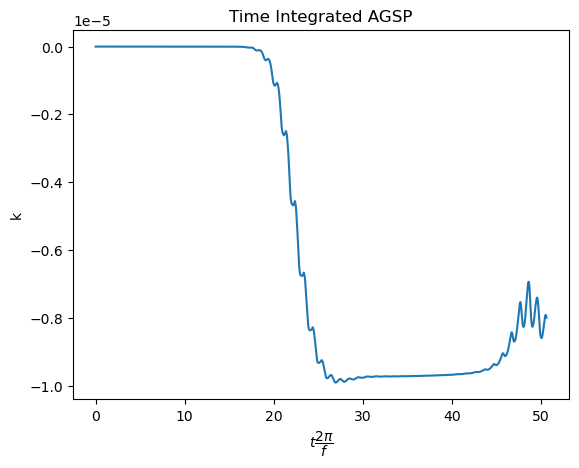

In [60]:
seconds = GSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_AGSP = (AGSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_AGSP.intp,integrated_AGSP)
plt.title("Time Integrated AGSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

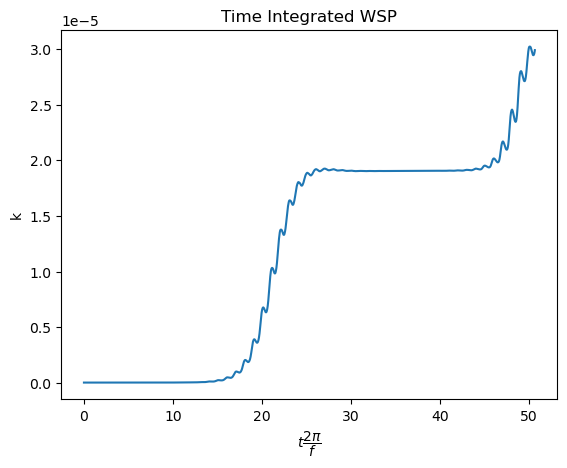

In [61]:
seconds = WSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
WSP_spatial_average_time_series_ip = WSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_WSP = (WSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_WSP.intp,integrated_WSP)
plt.title("Time Integrated WSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

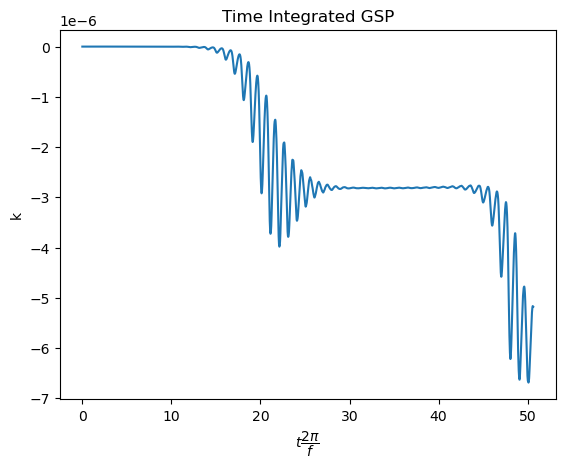

In [62]:
seconds = GSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_GSP = (GSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_GSP.intp,integrated_GSP)
plt.title("Time Integrated GSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

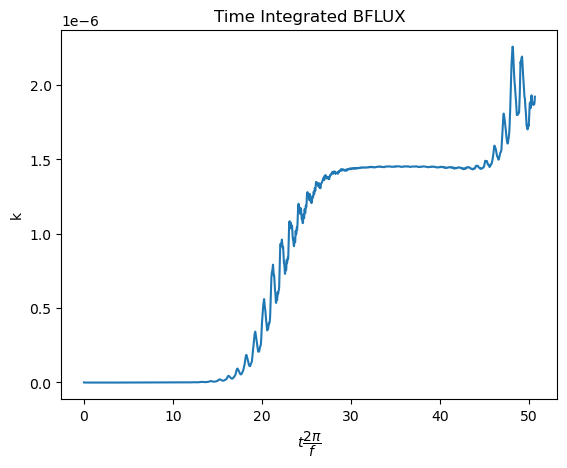

In [63]:
seconds = BFLUX_spatial_average_time_series_ip.time/pd.Timedelta("1s")
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_BFLUX = (BFLUX_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_BFLUX.intp,integrated_BFLUX)
plt.title("Time Integrated BFLUX")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

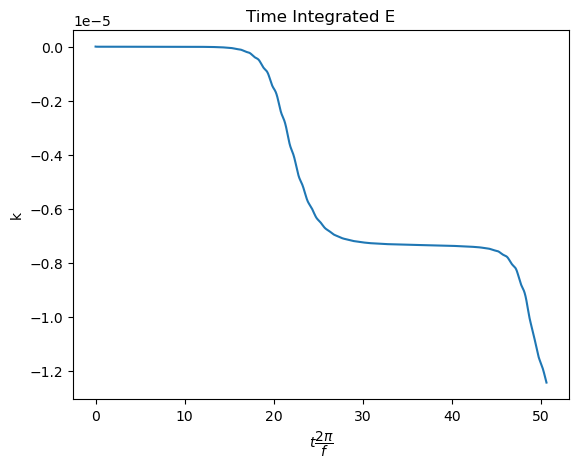

In [64]:
seconds = E_spatial_average_time_series_ip.time/pd.Timedelta("1s")
E_spatial_average_time_series_ip = E_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_E = (-1*E_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_E.intp,integrated_E)
plt.title("Time Integrated E")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [65]:
# seconds = PWORK_spatial_average_time_series_ip.time/pd.Timedelta("1s")
# PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
# integrated_PWORK = (PWORK_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
# integrated_PWORK

In [66]:
# PWORK_spatial_average_time_series_ip.sec.diff(dim='sec')

In [67]:
# seconds = PWORK_spatial_average_time_series_ip.time/pd.Timedelta("1s")
# PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
# integrated_PWORK = (PWORK_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
# plt.plot(integrated_PWORK.time,integrated_PWORK)
# plt.title("Time Integrated PWORK")
# plt.xlabel("$t\dfrac{2\pi}{f}$")
# plt.ylabel("k")
# # plt.yscale('log')
# plt.show()

In [68]:
# seconds = KDISS_spatial_average_time_series_ip.time/pd.Timedelta("1s")
# KDISS_spatial_average_time_series_ip = KDISS_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
# integrated_KDISS = (KDISS_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
# plt.plot(integrated_KDISS.time,integrated_KDISS)
# plt.title("Time Integrated KDISS")
# plt.xlabel("$t\dfrac{2\pi}{f}$")
# plt.ylabel("k")
# # plt.yscale('log')
# plt.show()

In [69]:
# ocean_data

In [70]:
# seconds = KTRANS_spatial_average_time_series_ip.time/pd.Timedelta("1s")
# KTRANS_spatial_average_time_series_ip = KTRANS_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
# integrated_KTRANS = (KTRANS_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
# plt.plot(integrated_KTRANS.time,integrated_KTRANS)
# plt.title("Time Integrated PWORK")
# plt.xlabel("$t\dfrac{2\pi}{f}$")
# plt.ylabel("k")
# # plt.yscale('log')
# plt.show()

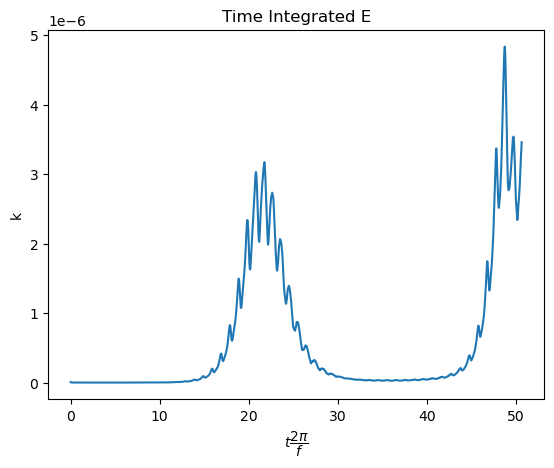

In [71]:
plt.plot(KE_turb_ip.intp,KE_turb_ip)
plt.title("Time Integrated E")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

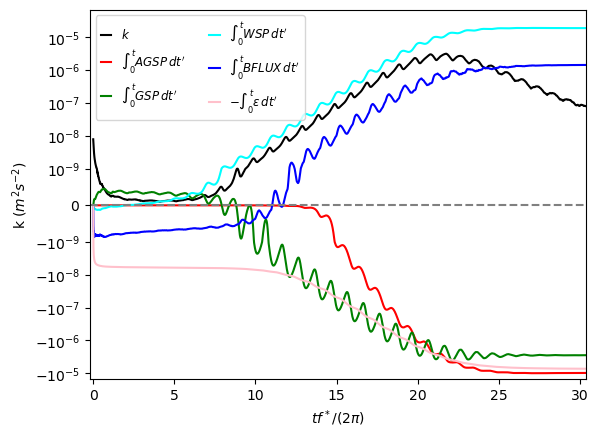

In [178]:
start = 0
end = 6000
plt.plot(KE_turb_ip.intp[start:end],KE_turb_ip[start:end],label="$k$",color="k")
plt.plot(integrated_AGSP.intp[start:end],integrated_AGSP[start:end],label="$\int_0^tAGSP\,dt'$",color="red")
plt.plot(integrated_GSP.intp[start:end],integrated_GSP[start:end],label="$\int_0^tGSP\,dt'$",color="green")
plt.plot(integrated_WSP.intp[start:end],integrated_WSP[start:end],label="$\int_0^tWSP\,dt'$",color="cyan")
plt.plot(integrated_BFLUX.intp[start:end],integrated_BFLUX[start:end],label="$\int_0^tBFLUX\,dt'$",color="blue")
# plt.plot(integrated_KDISS.intp[ts:tf],integrated_KDISS[ts:tf], label="$\int_0^tKDISS\,dt'$",color="yellow")
# plt.plot(integrated_KTRANS.intp[ts:tf],integrated_KTRANS[ts:tf],label="$\int_0^tKTRANSdt'$",color="cyan")
plt.plot(integrated_E.intp[start:end],integrated_E[start:end],label="$-\int_0^t\epsilon\,dt'$",color="pink")
plt.axhline(color="grey",linestyle="--",xmin=0,xmax=30)
# plt.yscale("symlog")
# plt.xlim(left=0)
plt.xlabel("$tf^*/(2\pi)$")
plt.ylabel(r"k $(m^2 s^{-2})$")
plt.legend(loc="upper left",prop={'size':8.5},ncol=2,handlelength=0.9) # handlelength=0.7
# plt.title("Turbulent Kinetic Energy")
plt.yscale("symlog",linthresh=1e-9)
plt.xlim([-0.2,KE_turb_ip.intp[end]])
plt.ylim([-1.5e-5,7e-5])
plt.savefig("time_integrated_TKE_terms.png")

plt.show()

In [ ]:
sum = KE_turb_ip-integrated_AGSP-integrated_GSP-integrated_WSP-integrated_BFLUX-integrated_E
plt.plot(sum.intp,sum)
plt.title("Residual of Turbulent Kinetic Energy")
plt.xlabel("$t\dfrac{f^*}{2\pi}$")
plt.ylabel("Residual")

In [ ]:
dkdt

In [ ]:
dkdt

In [ ]:
integrated_KE = (dkdt).cumulative_integrate(coord="intp")
plt.plot(integrated_KE.intp,integrated_KE)
plt.title("Time Integrated dkdt")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
KE_check = ocean_data.k.mean(dim=['xF','yC','zC'])
inertial_period = KE_check.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
KE_check_ip = KE_check.assign_coords(intp = ('time',inertial_period.data))
plt.plot(KE_check_ip.intp[0:250],KE_check_ip[0:250])
plt.title("Time Integrated dkdt")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
da = xr.DataArray(
    np.arange(12).reshape(4, 3),
    dims=["x", "y"],
    coords={"x": [0, 0.1, 1.1, 1.2]},
)
da
da.integrate("x")

In [ ]:
da.cumulative_integrate("x")

In [ ]:
(da*da.x.diff(dim='x')).cumsum("x")*0.5